# House Price Advanced Regression
## Problem Statement
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know 
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',81)

## 1. Reading and Understanding Data

In [2]:
housing_df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/9cefd607-bbb7-443d-bb3e-eac9fef04453/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 1460 rows and 81 columns
housing_df.shape

(1460, 81)

In [4]:
# column names
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# column dtypes
housing_df.dtypes.sort_values()

Id                 int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
BsmtFinSF2         int64
BsmtFinSF1         int64
SalePrice          int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
GarageYrBlt      float64
LotFrontage      float64
MasVnrArea       float64
Foundation        object
GarageFinish      object


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis [EDA]


- <b> GrLivArea / SalePrice

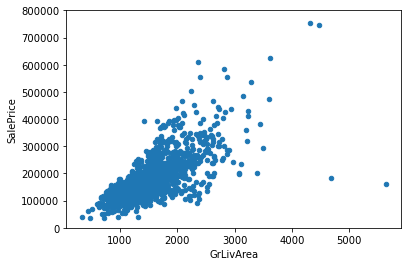

In [8]:
housing_df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))
plt.show()

- `GrLivArea`: Above grade (ground) living area square feet   
- `GrLivArea` is linearly related to `SalePrice` to some extent with some outliers.    

- <b> `TotalBsmtSF` / `SalePrice`

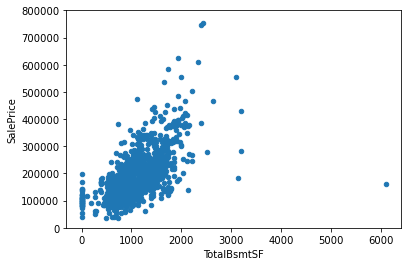

In [9]:
housing_df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))
plt.show()

- `TotalBsmtSF`: Total square feet of basement area
- `TotalBsmtSF` is linearly related to SalePrice with a steep slope. It also have some outliers in the dataset    

- <b> `OverallQual` / `SalePrice`

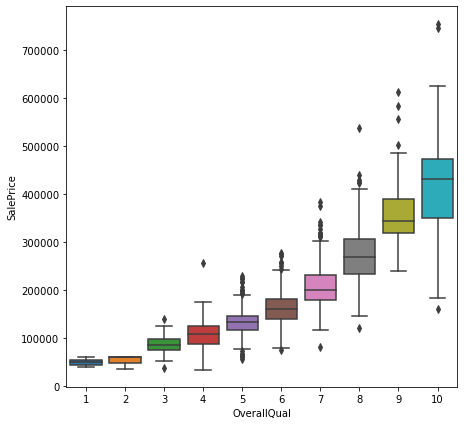

In [10]:
plt.subplots(figsize=(7,7))
sns.boxplot(x='OverallQual', y="SalePrice", data=housing_df)

- `Saleprice` is increasing with increase in `OverallQual`

- <b> Neighborhood / SalePrice

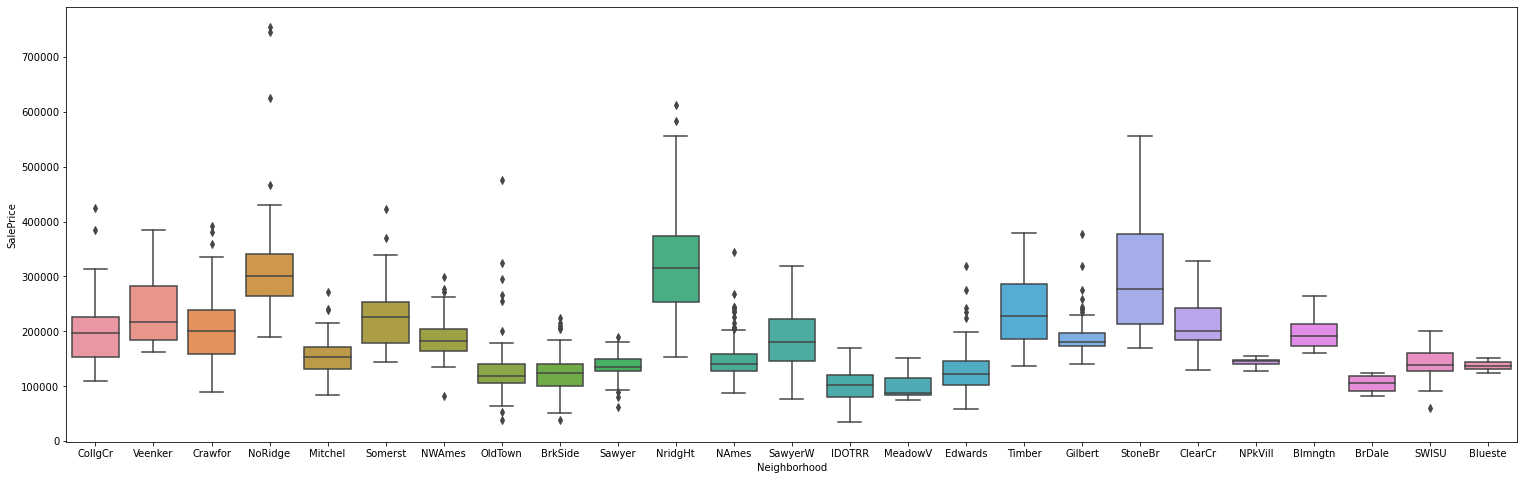

In [11]:
plt.subplots(figsize=(26, 8))
sns.boxplot('Neighborhood', y="SalePrice", data=housing_df)
plt.show()

- Some `neighborhood` values are having positive impact on the `SalePrice`.

- <b>YearBuilt / SalePrice

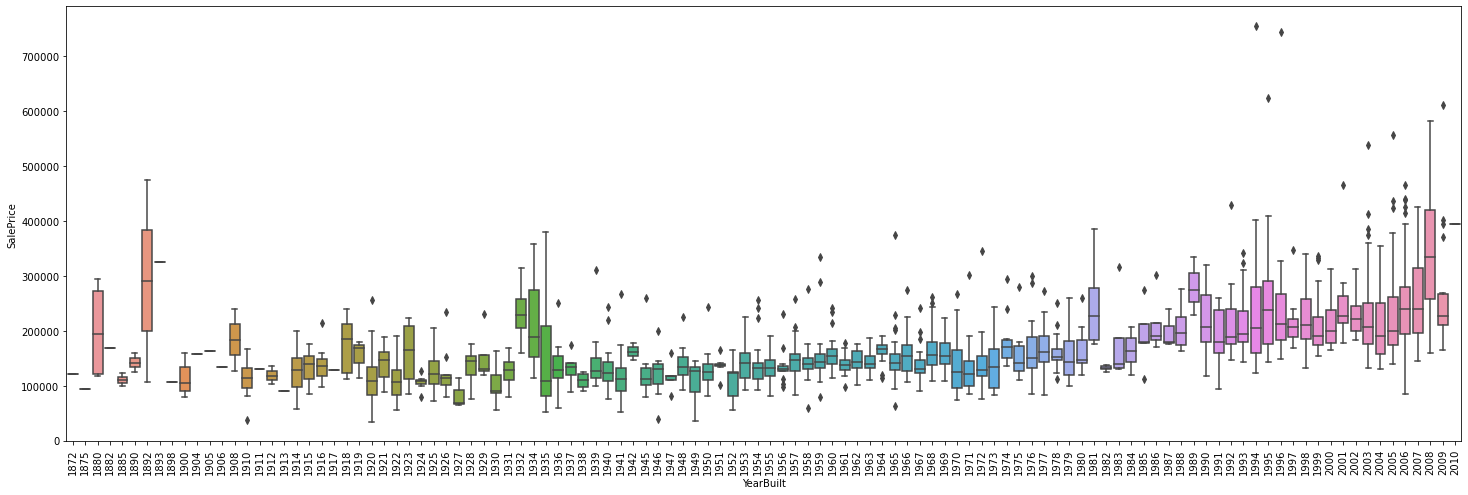

In [12]:
plt.subplots(figsize=(25,8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=housing_df)
plt.xticks(rotation=90);

- There is an increase in `SalePrice` generally with respect to time
- We cant compare the `SalePrice` over the years because of inflation.

## Correlation Matrix

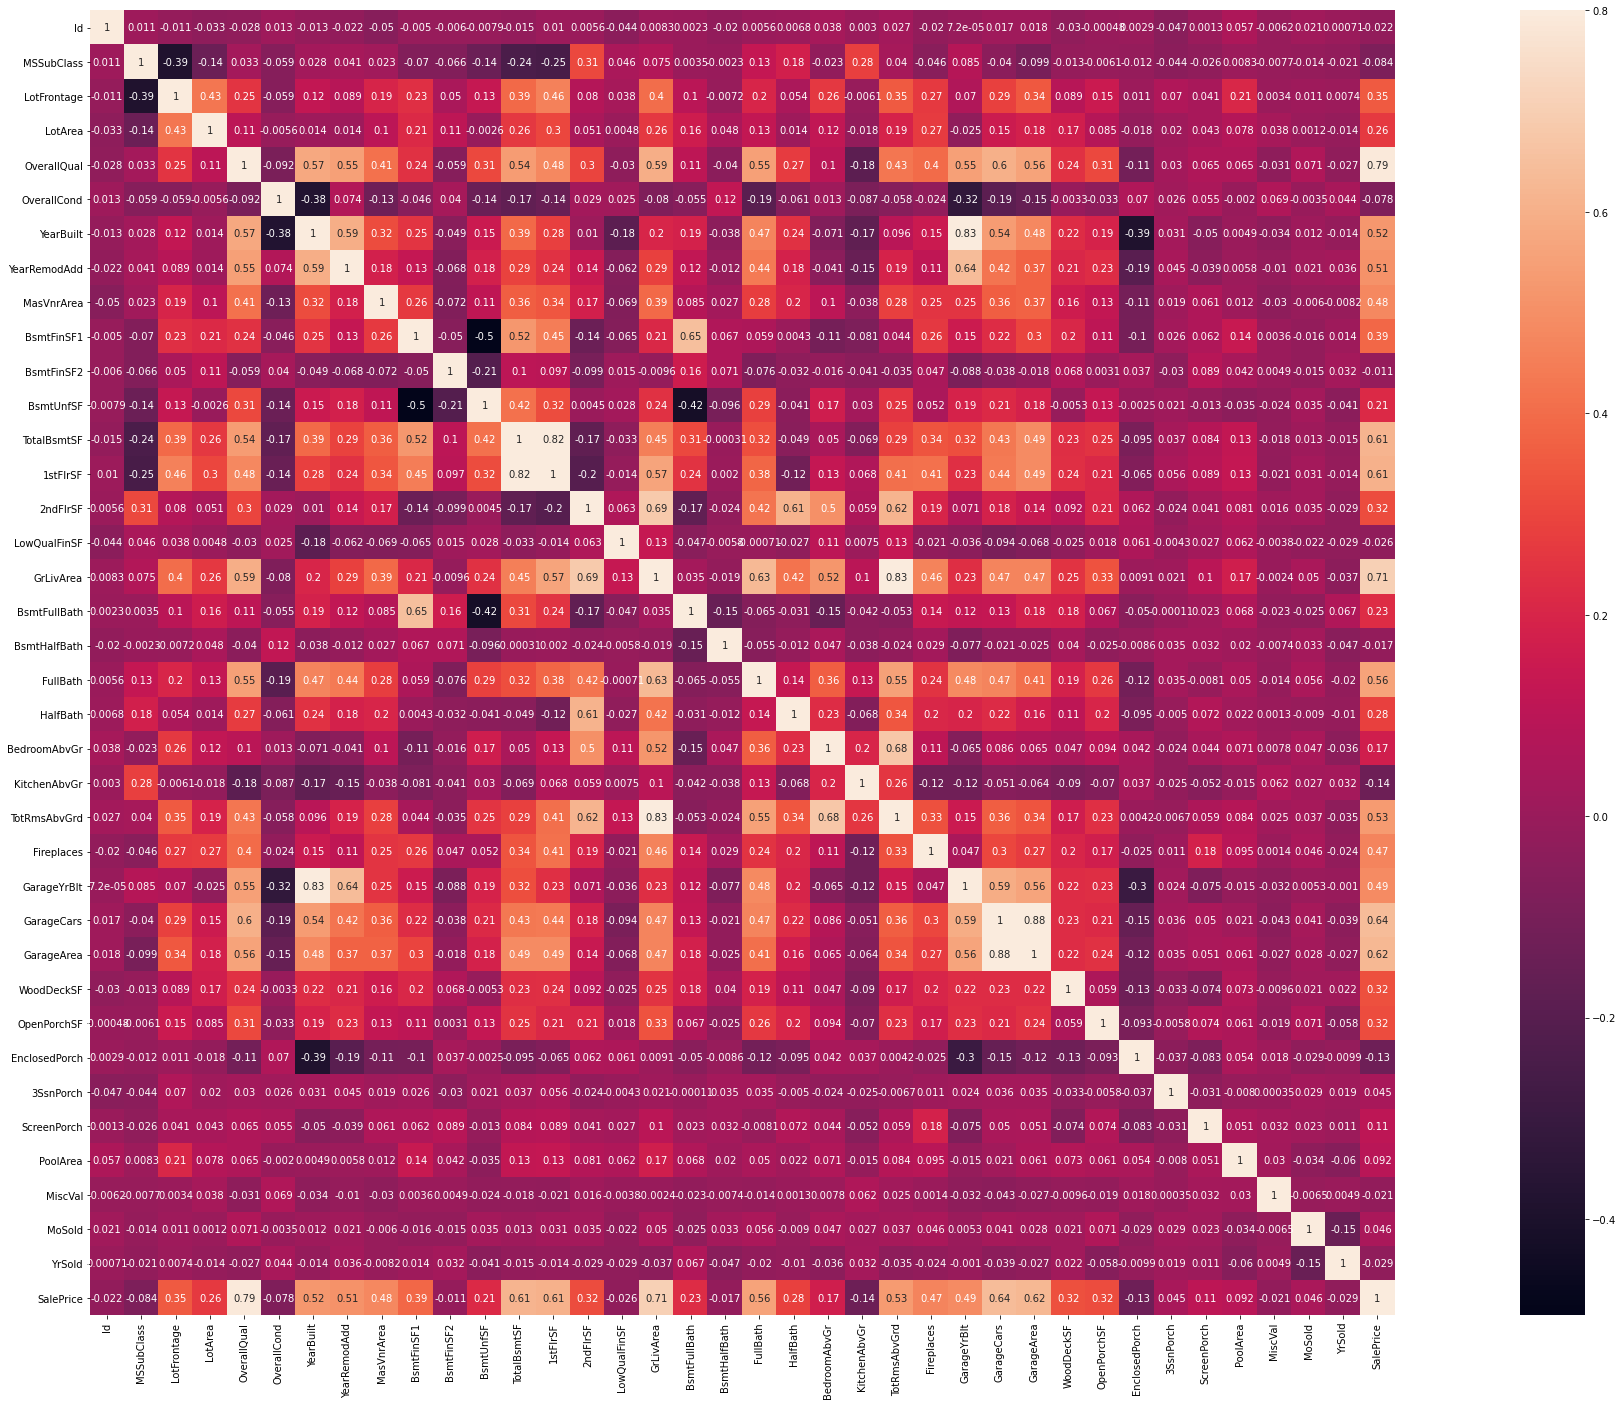

In [13]:
plt.subplots(figsize=(45, 24))
sns.heatmap(housing_df.corr(), annot = True, vmax=.8, square=True);

- `OverallQual`, `GrLivArea` and `TotalBsmtSF` are strongly correlated with `SalePrice`.

- `TotalBsmtSF` and `1stFloor` are corelated. We can keep `TotalBsmtSF` just to say that our first guess was right 

- `TotRmsAbvGrd` and `GrLivArea` are also corelated.

- `YearBuilt` is slightly correlated with `SalePrice`. 

- <b>Dropping Columns which are not useful for analysis much
    - `Id` because we dont use id in analysis
    - `MoSold` because there is no column which tells us month of house construction. So, `MoSold` doesn't bring much to analysis

In [14]:
housing_df.drop(['Id','MoSold'],axis=1,inplace=True)
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Checking for null values

In [15]:
null_col = housing_df.columns[housing_df.isnull().sum()>0]
null_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
housing_df[null_col].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

|Column Name| Description| Column Name | Description |Column Name| Description| Column Name | Description |
|--|--|--|--|--|--|--|--|
| PoolQC | Pool Quality | MiscFeature | Miscellaneous Features | Alley | Type of Alley Access | Fence | Fence Quality | 
|FireplaceQu|Fireplace quality | LotFrontage| Linear Feet of street connected to house | GarageYrBlt | Year Garage built | GarageType | Garage type|
GarageFinish|Interior finish of Garage|GarageQual|Garage Quality|GarageCond|Garage Condition | BsmtExposure |Basement Exposure|
|BsmtFinType2|Rating of Basement finished area|BsmtFinType1|Rating of Basement finished area|BsmtCond|General Condition of Basement|BsmtQual|Height of Basement|
MasVnrArea|Masonry Veener size|MasVnrType|Masonry Veener Type|Electrical|Electrical System|

- <b>`MasVnrType`</b>

In [17]:
housing_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- Imputing `NaN` values with `None`

- <b>`MasVnrArea`</b>

In [18]:
housing_df[housing_df.MasVnrType.isnull() & ~housing_df.MasVnrArea.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice


- <b>Imputing `NaN` values in `MasVnrArea` with `0` as `NaN` values in `MasVnrArea` are `present only if MasVnrType` value is `NaN` as well</b>

- <b>`LotFrontage`</b>

In [19]:
housing_df.LotFrontage.describe(percentiles=[0.2,0.4,0.6,0.8,0.9,1])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
20%        53.000000
40%        63.000000
50%        69.000000
60%        74.000000
80%        85.000000
90%        96.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

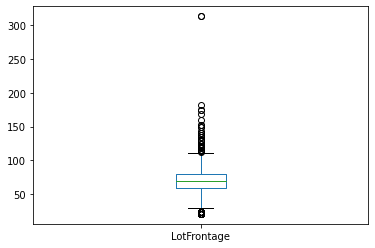

In [20]:
housing_df.LotFrontage.plot.box()

- Imputing `NaN` values with `median` value because of outlier presence.

In [21]:
housing_df.LotFrontage[housing_df.LotFrontage.isnull()] = housing_df.LotFrontage.median()

- `Electrical`

In [22]:
housing_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- Imputing `NaN` values with `SBrKr`

|`Column Name`|Replacing NaN with|`Column Name`|Replacing NaN with|`Column Name`|Replacing NaN with|`Column Name`|Replacing NaN with|
|--|--|--|--|--|--|--|--|
|<b>PoolQC</b>|No Pool|<b>MiscFeature</b>|None|<b>Alley</b>|No alley access|<b>Fence</b>|No Fence|
|<b>FireplaceQu</b>|No Fireplace|<b>GarageYrBlt</b>|0(No Garage)|<b>GarageType</b>|No Garage|<b>GarageFinish</b>|No Garage|
|<b>GarageQual</b>|No Garage|<b>GarageCond</b>|No Garage|<b>BsmtExposure</b>|No Basement|<b>BsmtFinType2</b>|No Basement|
|<b>BsmtFinType1</b>|No Basement|<b>BsmtCond</b>|No Basement|<b>BsmtQual</b>|No Basement|<b>MasVnrType</b>|None(Mode)|
|<b>MasVnrArea</b>|0|<b>LotFrontage</b>|Median value|<b>Electrical</b>|SBrkr(Mode)|

In [23]:
col_dict = {'PoolQC':"No Pool",'MiscFeature':"None",'Alley':"No alley access",'Fence':"No Fence",'FireplaceQu':"No Fireplace",
           'GarageYrBlt':0,'GarageType':"No Garage",'GarageFinish':"No Garage",'GarageQual':"No Garage",
            'GarageCond':"No Garage",'BsmtExposure':"No Basement",'BsmtFinType2':"No Basement",'BsmtFinType1':"No Basement",
           'BsmtCond':"No Basement",'BsmtQual':"No Basement",'MasVnrType':"None",'MasVnrArea':0,'Electrical':"SBrkr"}
for i in col_dict:
    housing_df[i][housing_df[i].isnull()] = col_dict[i]
    print('Count of null values after imputing = ',housing_df[i].isnull().sum())
    print(housing_df[i].value_counts())   

Count of null values after imputing =  0
No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64
Count of null values after imputing =  0
None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
Count of null values after imputing =  0
No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
Count of null values after imputing =  0
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64
Count of null values after imputing =  0
No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64
Count of null values after imputing =  0
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64
Count of null valu

In [24]:
# checking null values in columns
housing_df.isnull().sum().sort_values(ascending=False)

SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
OverallCond      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
3SsnPorch        0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
GarageFinish     0
PoolArea         0
PoolQC      

In [25]:
# checking null values in rows
housing_df[housing_df.isnull().sum(axis = 1) > 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice


- <b>No `NaN` values in dataframe</b>

## Checking Multiple/Duplicate Entries

In [26]:
housing_df[housing_df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice


- <b>`No duplicate entries`</b>

## Checking Outliers/ Outlier treatment

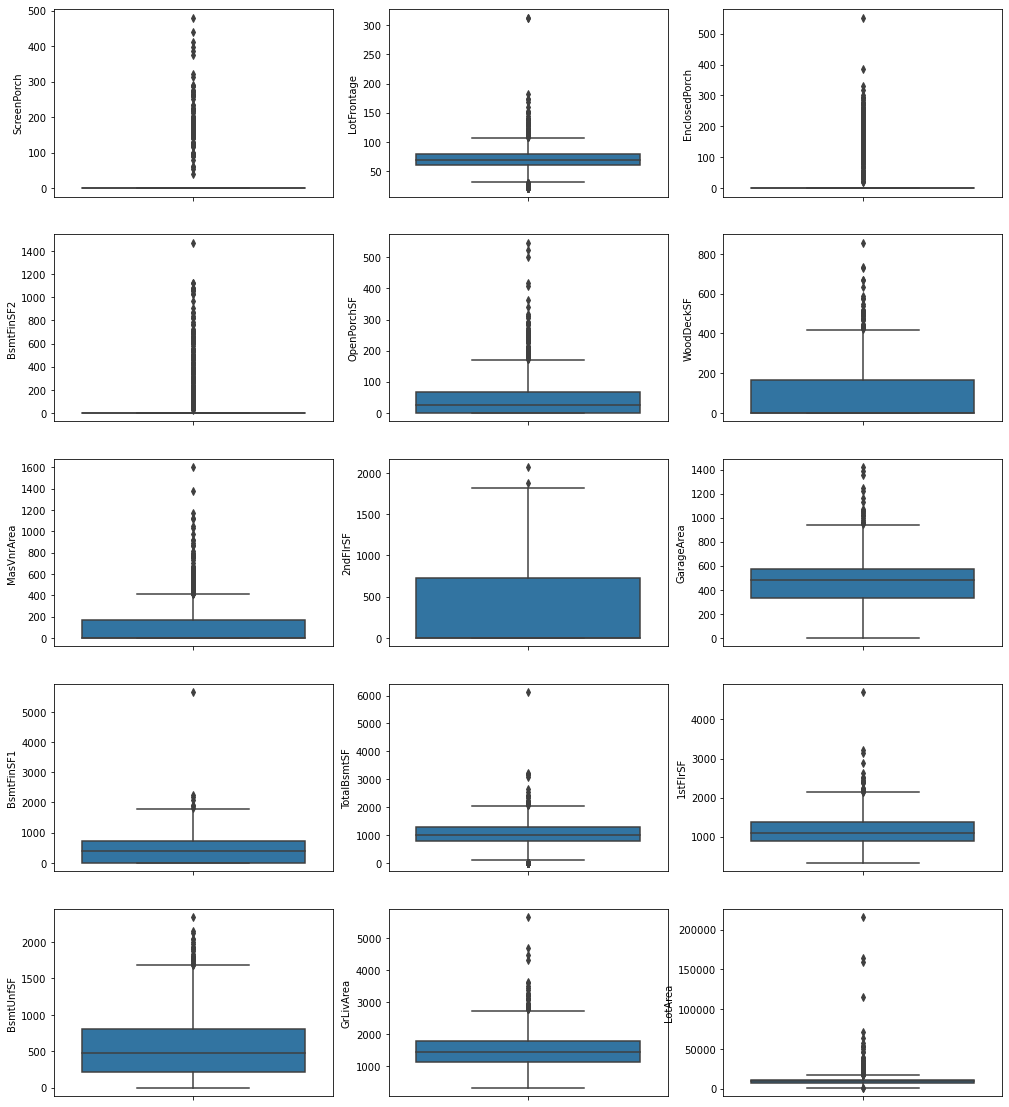

In [27]:
# Check the outliers in all the numeric columns
num_col = ['ScreenPorch','LotFrontage','EnclosedPorch','BsmtFinSF2','OpenPorchSF','WoodDeckSF',
           'MasVnrArea','2ndFlrSF','GarageArea','BsmtFinSF1','TotalBsmtSF', '1stFlrSF',
           'BsmtUnfSF' ,'GrLivArea','LotArea']
plt.figure(figsize=(17, 20))
n = 1
for i in num_col:
    plt.subplot(5,3,n)
    sns.boxplot(y = i, data = housing_df)
    n+=1
plt.show()

In [28]:
housing_df[num_col].describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,ScreenPorch,LotFrontage,EnclosedPorch,BsmtFinSF2,OpenPorchSF,WoodDeckSF,MasVnrArea,2ndFlrSF,GarageArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,BsmtUnfSF,GrLivArea,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,15.060959,69.863699,21.954110,46.549315,46.660274,94.244521,103.117123,346.992466,472.980137,443.639726,1057.429452,1162.626712,567.240411,1515.463699,10516.828082
std,55.757415,22.027677,61.119149,161.319273,66.256028,125.338794,180.731373,436.528436,213.804841,456.098091,438.705324,386.587738,441.866955,525.480383,9981.264932
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1300.000000
25%,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.500000,0.000000,795.750000,882.000000,223.000000,1129.500000,7553.500000
50%,0.000000,69.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,480.000000,383.500000,991.500000,1087.000000,477.500000,1464.000000,9478.500000
75%,0.000000,79.000000,0.000000,0.000000,68.000000,168.000000,164.250000,728.000000,576.000000,712.250000,1298.250000,1391.250000,808.000000,1776.750000,11601.500000
90%,0.000000,92.000000,112.000000,117.200000,130.000000,262.000000,335.000000,954.200000,757.100000,1065.500000,1602.200000,1680.000000,1232.000000,2158.300000,14381.700000
95%,160.000000,104.000000,180.150000,396.200000,175.050000,335.000000,456.000000,1141.050000,850.100000,1274.000000,1753.000000,1831.250000,1468.000000,2466.100000,17401.150000
99%,268.050000,137.410000,261.050000,830.380000,285.820000,505.460000,791.280000,1418.920000,1002.790000,1572.410000,2155.050000,2219.460000,1797.050000,3123.480000,37567.640000


In [29]:
# Removed Outliers
for col in num_col:
    percentiles = housing_df[col].quantile([0.01,0.99]).values
    housing_df[col][housing_df[col] <= percentiles[0]] = percentiles[0]
    housing_df[col][housing_df[col] >= percentiles[1]] = percentiles[1]

## Handling Skewed Data
- Dropping the following columns that have more than 85% values associated to a specific value

In [30]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
columnsToBeRemoved
housing_df.drop(columnsToBeRemoved,axis=1,inplace=True)

### Checking whether `Target` variable is normally distributed or not

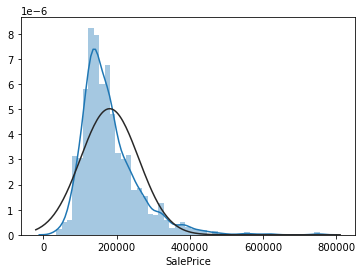

In [31]:
from scipy import stats
from scipy.stats import norm

# checking the target variable
sns.distplot(housing_df.SalePrice,fit=norm)

- <b> used log1p = log(n+1) to make target variable's distribution as normal distribution because target variable is skewed towards right. For Positive skewness, log tranformation usually works well.

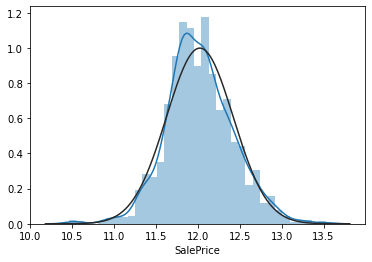

In [32]:
housing_df["SalePrice"] = np.log1p(housing_df["SalePrice"])
sns.distplot(housing_df.SalePrice,fit = norm)

- Used `log1p` transformation to convert target variable to `normally distributed`

## Creating Dummies
- <b>`Manual Encoding`</b>

In [33]:
# features where manual level encoding is required 
cat_col_manual_encoding = ['ExterQual', 'ExterCond', 'BsmtQual','BsmtExposure', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [34]:
# Manual encoding for some categorical variable
def manual_encoding(x):
    if x=='Ex':
        x = 5
    elif x=='Gd':
        x = 4
    elif x=='TA' or 'Av':
        x = 3
    elif x=='Fa' or 'Mn':
        x = 2
    elif x=='Po':
        x = 1
    elif x=='No':
        x= 1
    else:
        x= 0
    return x

for i in cat_col_manual_encoding:
    housing_df[i] = housing_df[i].apply(manual_encoding)
    print(housing_df[i].value_counts())

3    920
4    488
5     52
Name: ExterQual, dtype: int64
3    1311
4     146
5       3
Name: ExterCond, dtype: int64
3    721
4    618
5    121
Name: BsmtQual, dtype: int64
3    1326
4     134
Name: BsmtExposure, dtype: int64
3    1395
4      65
Name: BsmtCond, dtype: int64
5    741
3    478
4    241
Name: HeatingQC, dtype: int64
3    774
4    586
5    100
Name: KitchenQual, dtype: int64
3    1056
4     380
5      24
Name: FireplaceQu, dtype: int64
3    1443
4      14
5       3
Name: GarageQual, dtype: int64
3    1449
4       9
5       2
Name: GarageCond, dtype: int64
3    1455
4       3
5       2
Name: PoolQC, dtype: int64


In [35]:
rem_cat_col = housing_df.select_dtypes("object").columns

# Creating dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(housing_df[rem_cat_col], drop_first=True)

# Adding the results to the master dataframe
housing_df = pd.concat([housing_df, dummy1], axis=1)

# dropping the original variables
housing_df.drop(rem_cat_col, axis=1, inplace=True)
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,2003,2003,196.0,4,3,4,3,3,706.0,150.0,856.0,5,856.0,854.0,1710.0,1,2,1,3,4,8,0,3,2003.0,2,548.0,3,3,0.0,61.0,3,2008,12.247699,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,

In [36]:
housing_df.shape

(1460, 217)

In [37]:
housing_df['property_Age'] = housing_df['YrSold'] - housing_df['YearBuilt'] 
housing_df['property_Age'].head()

# dropping 'YearBuilt' and `YrSold` because of newly created variable `Property_Age`
housing_df.drop(['YearBuilt','YrSold'],axis=1,inplace=True)

In [38]:
train_df = housing_df
train_df.shape, housing_df.shape

((1460, 216), (1460, 216))

## Splitting the data into train and test

In [39]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
train_df.shape, test_df.shape

((1021, 216), (438, 216))

- <b> Using `PowerTransformer` to make data more Gaussian-like 

In [41]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
p_transformer = pt.fit_transform(train_df)
PowerTransformer_df= pd.DataFrame(p_transformer, index=train_df.index, columns=train_df.columns)
PowerTransformer_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,property_Age
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.0,1.021000e+03,1021.0,1021.0,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.0,1021.000000,1.021000e+03,1.021000e+03,1021.0,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.

- <b> Using `StandardScaler` to Standardize features by removing the mean and scaling to unit variance.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
S_scaler = scaler.fit_transform(PowerTransformer_df)
Standard_Scaler_df= pd.DataFrame(S_scaler,index=PowerTransformer_df.index, columns=PowerTransformer_df.columns)
 
# Independent variables( features ) to X_train df
X_train = Standard_Scaler_df.drop(['SalePrice'], axis=1)

# Target variable to y_train df
y_train = Standard_Scaler_df['SalePrice']
X_train.shape , y_train.shape

((1021, 215), (1021,))

## RFE
- <b> using RFE to select 15 features for model building

In [43]:
lm = LinearRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lm, 15)             # using RFE to get 15 features
rfe = rfe.fit(X_train, y_train)

column = X_train.columns[rfe.support_]
column

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'BldgType_Duplex',
       'property_Age'],
      dtype='object')

In [44]:
X_train_rfe = X_train[column]
X_train_rfe.shape

(1021, 15)

In [45]:
# Converting Test Data into Normal Distribution

p_transformer = pt.transform(test_df)
PowerTransformer_df= pd.DataFrame(p_transformer, index=test_df.index, columns=test_df.columns)
PowerTransformer_df

# Performing Scaling
S_scaler = scaler.transform(PowerTransformer_df)
Standard_Scaler_df= pd.DataFrame(S_scaler,index=PowerTransformer_df.index, columns=PowerTransformer_df.columns)

# Putting feature variable to X
X_test = Standard_Scaler_df.drop(['SalePrice'], axis=1)

# Target variable to y_test
y_test = Standard_Scaler_df['SalePrice']

X_test.shape, y_test.shape

((438, 215), (438,))

# Ridge

In [46]:
rr = Ridge(alpha=0.01)
rr.fit(X_train_rfe, y_train) 

pred_train_rr= rr.predict(X_train_rfe)
print("Train R-Squared in Ridge: ",r2_score(y_train, pred_train_rr))

X_test_sm = X_test[column]
pred_test_rr= rr.predict(X_test_sm)
print("Test R-Squared in Ridge: ",r2_score(y_test, pred_test_rr))

Train R-Squared in Ridge:  0.8970836741819805
Test R-Squared in Ridge:  0.8859834848128414


In [47]:
# GridSearchCV
from sklearn.model_selection import KFold

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

# GridSearchCV

# Ridge model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005800,1.167204e-03,0.002600,4.873539e-04,0.0001,{'alpha': 0.0001},0.896761,0.879728,0.895670,0.846665,0.907577,0.885280,0.021255,23,0.895727,0.900935,0.896845,0.905005,0.890716,0.897845,0.004840
1,0.003399,4.912901e-04,0.002399,4.915763e-04,0.001,{'alpha': 0.001},0.896762,0.879728,0.895670,0.846665,0.907576,0.885280,0.021255,22,0.895727,0.900935,0.896845,0.905005,0.890716,0.897845,0.004840
2,0.003199,3.998298e-04,0.002399,7.991800e-04,0.01,{'alpha': 0.01},0.896769,0.879737,0.895672,0.846666,0.907566,0.885282,0.021253,21,0.895727,0.900935,0.896845,0.905005,0.890716,0.897845,0.004840
3,0.005000,1.674253e-03,0.003201,1.166082e-03,0.05,{'alpha': 0.05},0.896804,0.879773,0.895682,0.846669,0.907523,0.885290,0.021246,20,0.895727,0.900935,0.896845,0.905005,0.890716,0.897845,0.004840
4,0.006203,1.938412e-03,0.003598,2.245679e-03,0.1,{'alpha': 0.1},0.896848,0.879818,0.895694,0.846673,0.907470,0.885301,0.021237,19,0.895726,0.900935,0.896844,0.905005,0.890715,0.897845,0.004840
5,0.006601,1.018995e-03,0.004199,7.454502e-04,0.2,{'alpha': 0.2},0.896932,0.879907,0.895717,0.846680,0.907364,0.885320,0.021219,17,0.895725,0.900934,0.896843,0.905004,0.890715,0.897844,0.004840
6,0.005401,7.992417e-04,0.003401,4.898266e-04,0.3,{'alpha': 0.3},0.897014,0.879993,0.895740,0.846688,0.907259,0.885339,0.021201,16,0.895723,0.900931,0.896842,0.905003,0.890714,0.897843,0.004840
7,0.003600,8.002402e-04,0.002800,4.001868e-04,0.4,{'alpha': 0.4},0.897094,0.880076,0.895762,0.846696,0.907156,0.885357,0.021184,15,0.895720,0.900928,0.896840,0.905001,0.890714,0.897841,0.004839
8,0.003000,1.323169e-06,0.002201,4.015208e-04,0.5,{'alpha': 0.5},0.897172,0.880157,0.895782,0.846703,0.907054,0.885374,0.021167,14,0.895716,0.900925,0.896837,0.904999,0.890712,0.897838,0.004839
9,0.003001,8.064048e-07,0.001800,7.490554e-04,0.6,{'alpha': 0.6},0.897247,0.880235,0.895803,0.846711,0.906952,0.885390,0.021150,12,0.895712,0.900920,0.896834,0.904997,0.890711,0.897835,0.004839


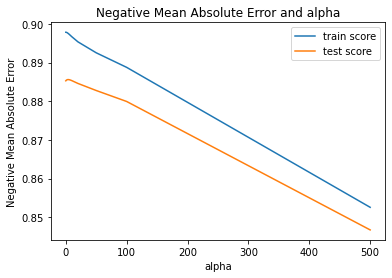

In [50]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

- <b> model with optimal alpha

In [51]:
rr = Ridge(alpha=4)
rr.fit(X_train_rfe, y_train) 

pred_train_rr= rr.predict(X_train_rfe)
print("Alpha = 4: Train Score", r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test_sm)
print("Alpha = 4: Test Score",r2_score(y_test, pred_test_rr))

Alpha = 4: Train Score 0.8968683844524449
Alpha = 4: Test Score 0.8861771593940252


In [52]:
# Ridge model parameters
rr_model_parameters = list(rr.coef_)
rr_model_parameters.insert(0, rr.intercept_)
rr_model_parameters = [round(x, 3) for x in rr_model_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0, "constant")

ridge_df = list(zip(cols, rr_model_parameters))
ridge_df = pd.DataFrame(ridge_df)
ridge_df = ridge_df.rename(columns = {0:'Features',1:'Coefficients'})
ridge_df.sort_values(by=['Coefficients'], ascending=False)

,Features,Coefficients
11,MSZoning_RL,0.377
7,GrLivArea,0.360
12,MSZoning_RM,0.269
2,OverallQual,0.233
9,MSZoning_FV,0.199
6,TotalBsmtSF,0.193
3,OverallCond,0.158
10,MSZoning_RH,0.103
8,GarageArea,0.097
1,LotArea,0.091


# Lasso

In [53]:
# lasso regression
ls = Lasso(alpha=0.001)
ls.fit(X_train_rfe, y_train)

# predict
y_train_pred = ls.predict(X_train_rfe)
print("Train R-Squared in Lasso :",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ls.predict(X_test_sm)
print("Test R-Squared in Lasso : " , r2_score(y_true=y_test, y_pred=y_test_pred))

Train R-Squared in Lasso : 0.8968921807701281
Test R-Squared in Lasso :  0.8861598831901616


In [54]:
# GridSearchCV
from sklearn.model_selection import KFold

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0 ]}

# GridSearchCV
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008659,0.003233,0.003001,0.001097,0.0001,{'alpha': 0.0001},0.896942,0.879923,0.895702,0.846720,0.907125,0.885282,0.021154,1,0.895725,0.900933,0.896843,0.905003,0.890713,0.897843,0.004840
1,0.005600,0.001744,0.002600,0.000800,0.001,{'alpha': 0.001},0.898277,0.881371,0.895852,0.847192,0.902828,0.885104,0.020271,2,0.895510,0.900719,0.896671,0.904856,0.890485,0.897648,0.004862
2,0.006002,0.000001,0.003063,0.000126,0.01,{'alpha': 0.01},0.895252,0.881122,0.890328,0.850179,0.887654,0.880907,0.016027,3,0.887160,0.893039,0.889276,0.897082,0.887170,0.890745,0.003826
3,0.006800,0.000401,0.004002,0.000003,0.05,{'alpha': 0.05},0.876278,0.873844,0.863170,0.850754,0.855858,0.863981,0.009901,4,0.869417,0.873755,0.872260,0.880305,0.868191,0.872786,0.004248
4,0.005200,0.000748,0.003001,0.000002,0.1,{'alpha': 0.1},0.835516,0.843939,0.816129,0.827709,0.801058,0.824870,0.015023,5,0.828316,0.832521,0.835964,0.842457,0.825864,0.833024,0.005854
5,0.004002,0.000632,0.002198,0.000398,0.2,{'alpha': 0.2},0.759967,0.780544,0.737710,0.775253,0.710210,0.752737,0.025949,6,0.752687,0.753660,0.767237,0.767864,0.747624,0.757815,0.008212
6,0.003000,0.000002,0.001399,0.000490,0.3,{'alpha': 0.3},0.668519,0.694416,0.652082,0.704295,0.598560,0.663574,0.037397,7,0.660239,0.660719,0.683799,0.684860,0.651030,0.668129,0.013675
7,0.004001,0.001673,0.002599,0.000801,0.4,{'alpha': 0.4},0.547960,0.570827,0.550945,0.598188,0.479388,0.549462,0.039359,8,0.539035,0.535735,0.578535,0.574230,0.534751,0.552457,0.019634
8,0.005600,0.000800,0.003400,0.000490,0.5,{'alpha': 0.5},0.420285,0.436205,0.436079,0.472205,0.359159,0.424787,0.036969,9,0.411408,0.406047,0.457119,0.450408,0.409218,0.426840,0.022151
9,0.004201,0.000401,0.002200,0.000399,0.6,{'alpha': 0.6},0.278764,0.285132,0.312601,0.333425,0.237661,0.289517,0.032511,10,0.269495,0.264317,0.329595,0.321242,0.275881,0.292106,0.027572


In [56]:
print(model_cv.best_params_)

{'alpha': 0.0001}


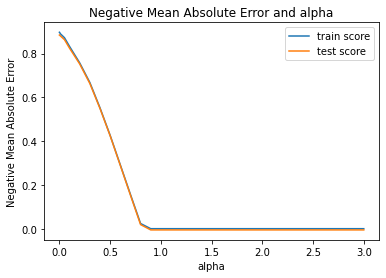

In [57]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

- <b> model with optimal alpha

In [58]:
# lasso regression
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_rfe, y_train)

# predict
y_train_pred = lasso.predict(X_train_rfe)
print("Alpha = 0.0001: Train Score",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_sm)
print("Alpha = 0.0001: Test Score",r2_score(y_true=y_test, y_pred=y_test_pred))

Alpha = 0.0001: Train Score 0.8970817285521024
Alpha = 0.0001: Test Score 0.8860165393879099


In [59]:
lasso.coef_

array([ 0.09108458,  0.23051119,  0.15747747,  0.05650032, -0.07859372,
        0.19488414,  0.3625871 ,  0.09666206,  0.23247243,  0.12085803,
        0.44277778,  0.32748325,  0.05908492, -0.0418266 , -0.29001008])

In [60]:
# lasso model parameters
l_model_parameters = list(lasso.coef_)
l_model_parameters.insert(0, lasso.intercept_)
l_model_parameters = [round(x, 3) for x in l_model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
lasso_df = list(zip(cols, l_model_parameters))
lasso_df = pd.DataFrame(lasso_df)
lasso_df = lasso_df.rename(columns = {0:'Parameters',1:'Coefficients'})
lasso_df = lasso_df[lasso_df['Coefficients'] != 0]
lasso_df.sort_values(by=['Coefficients'], ascending=False)

,Parameters,Coefficients
11,MSZoning_RL,0.443
7,GrLivArea,0.363
12,MSZoning_RM,0.327
9,MSZoning_FV,0.232
2,OverallQual,0.231
6,TotalBsmtSF,0.195
3,OverallCond,0.157
10,MSZoning_RH,0.121
8,GarageArea,0.097
1,LotArea,0.091


# Ridge model
- Optimal alpha value for ridge is 4
- Train data accuracy score for alpha = 4 is `89.7%`
- Test data accuracy score for alpha = 4 is `88.6%`
- Following are the top 10 predictor variables of ridge regression for `SalePrice`

In [61]:
ridge_df.sort_values(by=['Coefficients'], ascending=False).head(10)

,Features,Coefficients
11,MSZoning_RL,0.377
7,GrLivArea,0.360
12,MSZoning_RM,0.269
2,OverallQual,0.233
9,MSZoning_FV,0.199
6,TotalBsmtSF,0.193
3,OverallCond,0.158
10,MSZoning_RH,0.103
8,GarageArea,0.097
1,LotArea,0.091


# Lasso model
- Optimal alpha value for lasso is 0.0001
- Train data accuracy score for alpha = 0.0001 is `89.7%`
- Test data accuracy score for alpha = 0.0001 is `88.6%`
- Following are the top 10 predictor variables of lasso regression for `SalePrice`

In [62]:
lasso_df.sort_values(by=['Coefficients'], ascending=False).head(10)

,Parameters,Coefficients
11,MSZoning_RL,0.443
7,GrLivArea,0.363
12,MSZoning_RM,0.327
9,MSZoning_FV,0.232
2,OverallQual,0.231
6,TotalBsmtSF,0.195
3,OverallCond,0.157
10,MSZoning_RH,0.121
8,GarageArea,0.097
1,LotArea,0.091


- <b>Both Ridge and Lasso Regression models are good. Lasso is more preferrable because of it's low alpha value.